Step 1: Import Python Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Load and inspect Dataset 📄

In [59]:
df=pd.read_csv("/home/somia/Downloads/Titanic.csv")

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [62]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Step 3: Data Reduction 📉
Handling Missing values

In [63]:
df=df.drop(columns=['Name','Ticket'])

In [64]:
#numeric
df['Fare'].fillna(df['Fare'].mean(),inplace=True)#data distribution normal and fill is numeric
df['Age'].fillna(df['Age'].median(),inplace=True)#with most likely category
#categorical
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)#with most likely category
df['Sex'].fillna(df['Sex'].mode(),inplace=True)#with most likely category
df['Parch'].fillna(df['Parch'].mode(),inplace=True)#with most likely category



/tmp/ipykernel_2852/2336998889.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(),inplace=True)#data distribution normal and fill is numeric
/tmp/ipykernel_2852/2336998889.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [65]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## 3.	Provide a brief explanation of your chosen method for handling missing data
- mode This method replaces missing values with the most likely category
- mean when the data distribution is relatively normal
- median to replace with the med age between

Step 3: Check for Duplicates

In [66]:
df.duplicated().sum()

0

In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


Step 4: Feature Extraction

/tmp/ipykernel_2852/1425718890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin_Letter'] = df['Cabin'].str[0]
/tmp/ipykernel_2852/1425718890.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin_Letter'].fillna('Missing', inplace=True)
/tmp/ipykernel_2852/1425718890.

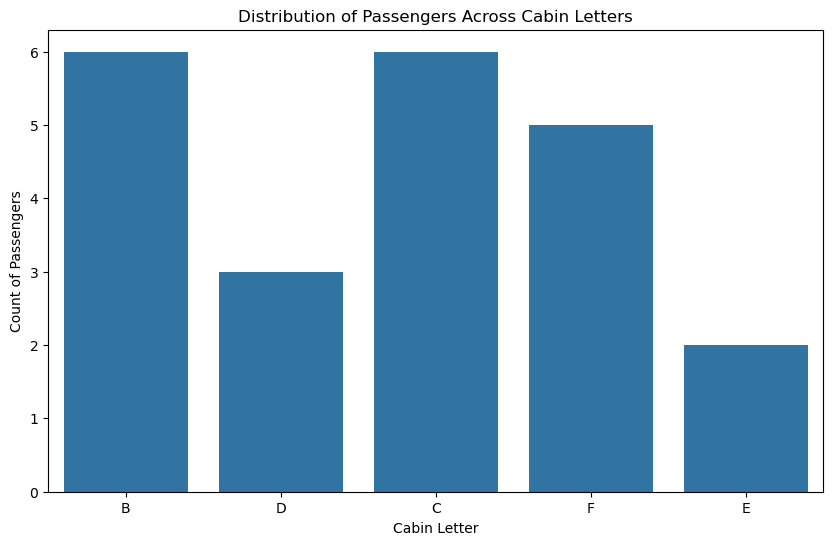

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Cabin_Letter'] = df['Cabin'].str[0]
df['Cabin_Letter'].fillna('Missing', inplace=True)
df = df[df['Cabin_Letter'] != 'Missing']
#visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Cabin_Letter', data=df)
plt.title('Distribution of Passengers Across Cabin Letters')
plt.xlabel('Cabin Letter')
plt.ylabel('Count of Passengers')
plt.show()

Step 5: Encode Categorical Variables

In [70]:
categorical_cols = ['Sex', 'Embarked', 'Cabin_letter']

df = pd.get_dummies(df, columns=categorical_cols)

Step 6: Visualize the Data

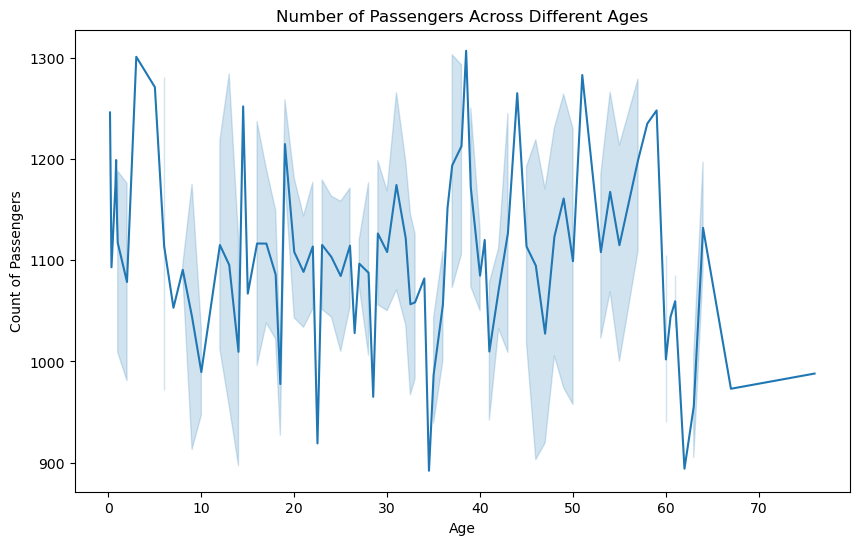

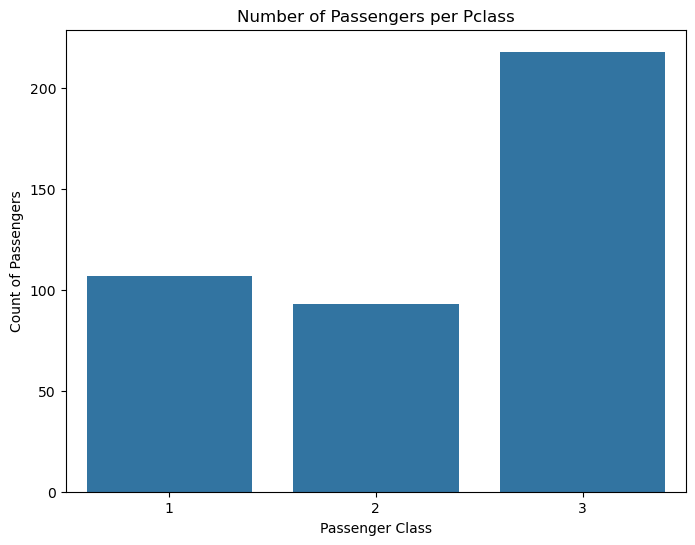

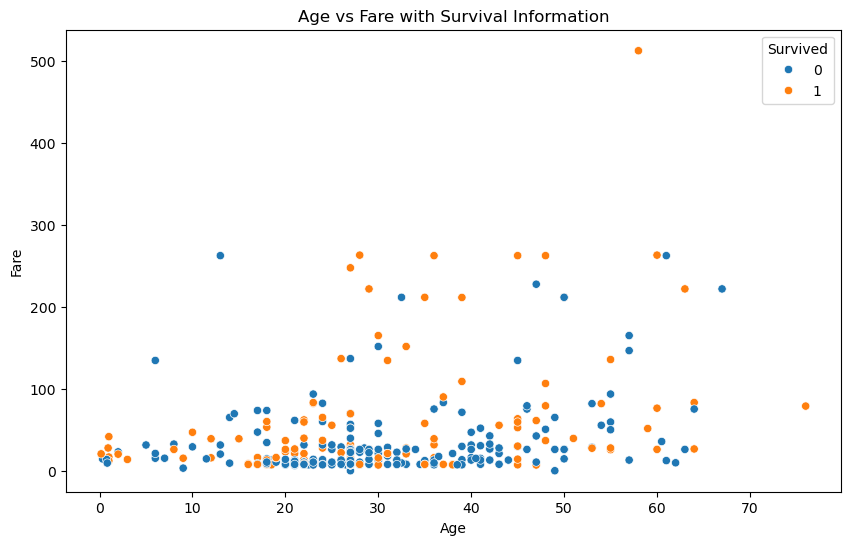

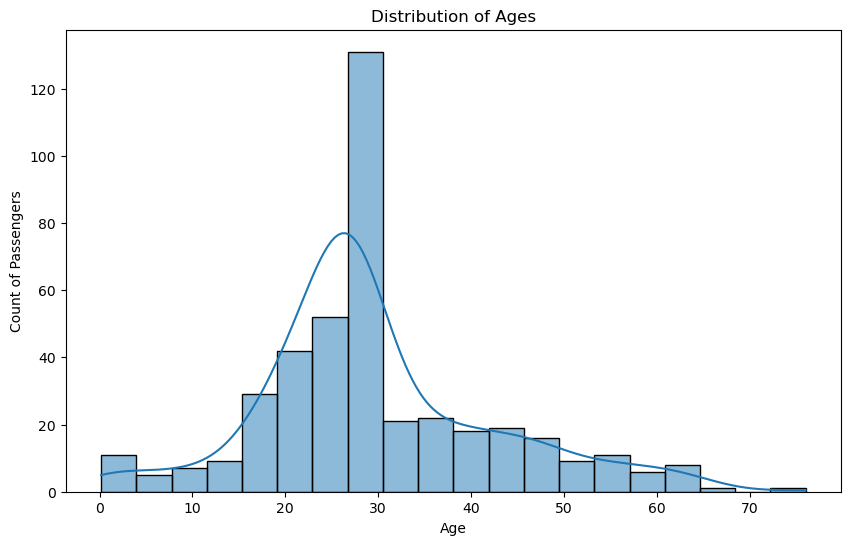

In [76]:
# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='PassengerId', data=df)
plt.title('Number of Passengers Across Different Ages')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

# Bar Plot for Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Number of Passengers per Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.show()

# Scatter Plot for Age and Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare with Survival Information')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()


## Step 7: Draw Insights
- Age Distribution: The majority of passengers were between 20 and 40 years old.
- Most passengers traveled in the third class
- There's a correlation between age and fare
- Passengers with cabins starting with 'C' and 'B' had a higher survival rate
- there's diversty of age in count of passenger

Step 6: Handeling Outlier 

PassengerId       Axes(0.125,0.653529;0.227941x0.226471)
Survived       Axes(0.398529,0.653529;0.227941x0.226471)
Pclass         Axes(0.672059,0.653529;0.227941x0.226471)
Age               Axes(0.125,0.381765;0.227941x0.226471)
SibSp          Axes(0.398529,0.381765;0.227941x0.226471)
Parch          Axes(0.672059,0.381765;0.227941x0.226471)
Fare                  Axes(0.125,0.11;0.227941x0.226471)
dtype: object

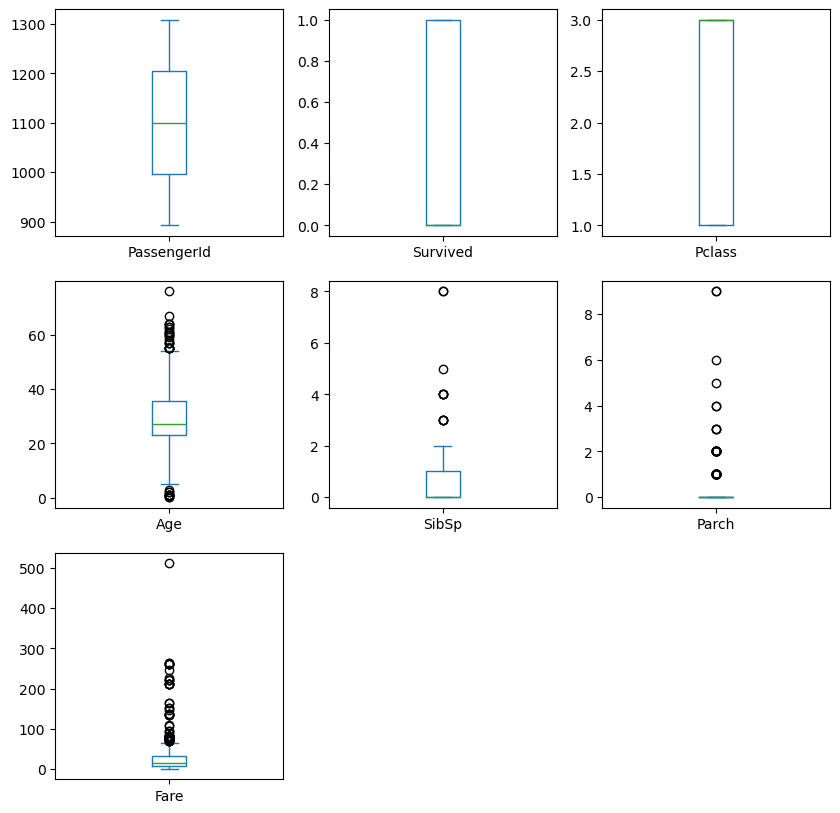

In [77]:
# Plotting box plots for each feature in the dataset
df.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))  

## sibling, parents and fare we don't need it as An influential factor for survival

In [78]:
df=df.drop(columns=['SibSp','Parch','Fare'])
df

,PassengerId,Survived,Pclass,Age,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_G,Cabin_letter_missing,Cabin_Letter
0,892,0,3,34.5,NaN,False,True,False,True,False,False,False,False,False,False,False,False,True,Missing
1,893,1,3,47.0,NaN,True,False,False,False,True,False,False,False,False,False,False,False,True,Missing
2,894,0,2,62.0,NaN,False,True,False,True,False,False,False,False,False,False,False,False,True,Missing
3,895,0,3,27.0,NaN,False,True,False,False,True,False,False,False,False,False,False,False,True,Missing
4,896,1,3,22.0,NaN,True,False,False,False,True,False,False,False,False,False,False,False,True,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,27.0,NaN,False,True,False,False,True,False,False,False,False,False,False,False,True,Missing
414,1306,1,1,39.0,C105,True,False,True,False,False,False,False,True,False,False,False,False,False,C
415,1307,0,3,38.5,NaN,False,True,False,False,True,False,False,False,False,False,False,False,True,Missing
416,1308,0,3,27.0,NaN,False,True,False,False,True,False,False,False,False,False,False,False,True,Missing


PassengerId       Axes(0.125,0.653529;0.227941x0.226471)
Survived       Axes(0.398529,0.653529;0.227941x0.226471)
Pclass         Axes(0.672059,0.653529;0.227941x0.226471)
Age               Axes(0.125,0.381765;0.227941x0.226471)
dtype: object

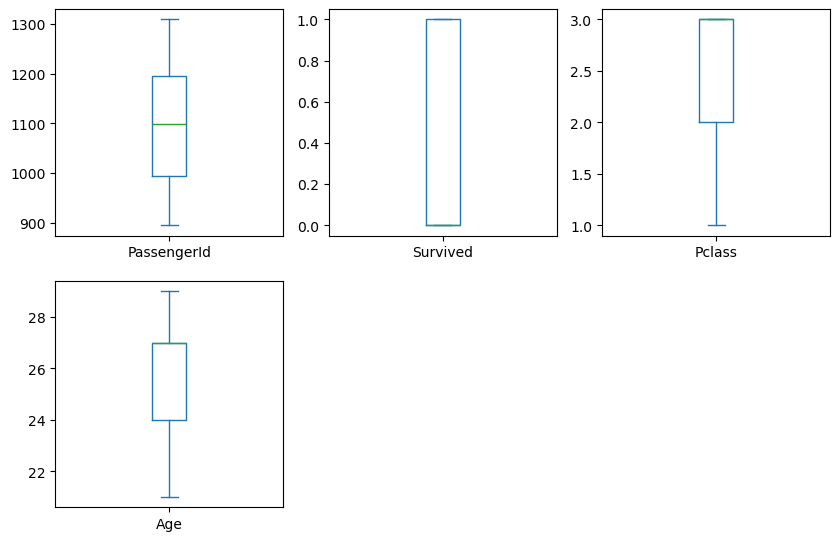

In [79]:
Q1 = 20
Q2 = 30
IQR = Q2 - Q1

# Define a threshold based on IQR (adjust multiplier as needed)
threshold = 1.5 * IQR

# Identify outliers
df = df[(df['Age'] > Q1 ) & (df['Age'] < Q2 )]

df.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))  